In [1]:
gt = [ True, True, True, True, False, True, False, True, True, False, True, True, True, True, False, False, False, True, True, True, True, True, False, True, False, True, False, True, True, False, False, True, False, True, False, True, True, True, True, True, False, False,True, False,True, True, False, False, False, False]

gt = ['B' if i else 'A' for i in gt]

In [58]:
import pandas as pd

df = pd.read_csv('../data/human_study_egg.csv')

# drop na
df = df.dropna()

df = df[df.columns[4:]]

In [59]:
n_participants = len(df)
acc = (df == gt).sum().sum() / (df.shape[0] * df.shape[1])
acc_per_image = ((df == gt).sum() / df.shape[0])
improved_images = (acc_per_image > 0.6).sum() / acc_per_image.shape[0]
failure_images = (acc_per_image < 0.4).sum() / acc_per_image.shape[0]
uncertain_images = ((acc_per_image >= 0.4) & (acc_per_image <= 0.6)).sum() / acc_per_image.shape[0]

print(f'Number of participants: {n_participants}')
print(f'EGG Preference: {acc * 100:.2f}%')
print(f'Improved images (p > 0.6): {improved_images * 100:.0f}%')
print(f'Failure images (p < 0.4): {failure_images * 100:.0f}%')
print(f'Uncertain images (0.4 < p < 0.6): {uncertain_images * 100:.0f}%')

Number of participants: 45
EGG Preference: 82.22%
Improved images (p > 0.6): 84%
Failure images (p < 0.4): 6%
Uncertain images (0.4 < p < 0.6): 10%


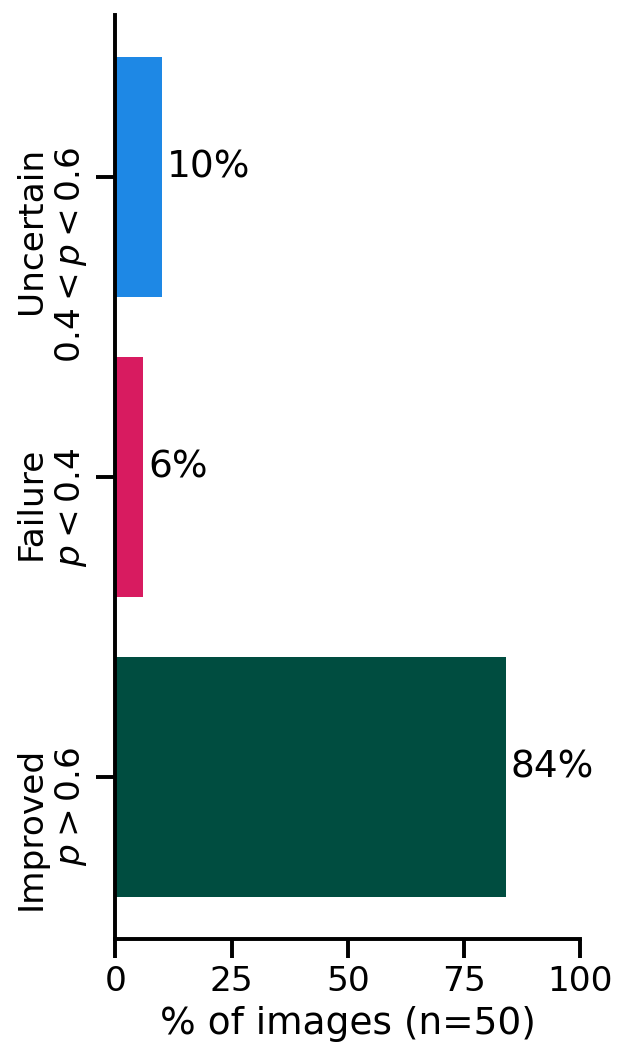

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
from egg.palettes import palettes

sns.set_context('talk')
plt.figure(figsize=(4, 8), dpi=150)
plt.barh([0, 1, 2], [improved_images * 100, failure_images * 100, uncertain_images * 100], color=[palettes['candy']['green'], palettes['candy']['pink'], palettes['candy']['blue']])
plt.yticks([0, 1, 2], ['Improved\n $p > 0.6$', 'Failure\n $p < 0.4$', 'Uncertain\n $0.4 < p < 0.6$'], rotation=90)
plt.xlim(0, 100)

plt.text(improved_images * 100 + 1, 0,  f"{improved_images * 100:.0f}%", ha='left')
plt.text(failure_images * 100 + 1, 1, f"{failure_images * 100:.0f}%", ha='left')
plt.text(uncertain_images * 100 + 1, 2, f"{uncertain_images * 100:.0f}%", ha='left')
plt.xlabel('% of images (n=50)')

# plt.tight_layout()
sns.despine(trim=False)
plt.savefig('psychophysics.png', dpi=150, bbox_inches='tight', pad_inches=0)

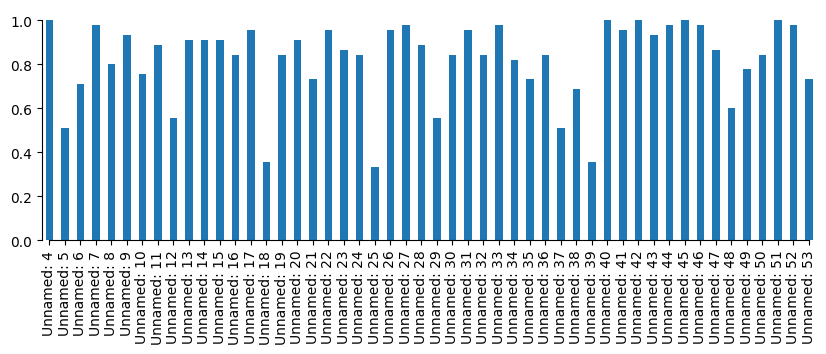

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')
plt.style.use('default')
plt.figure(figsize=(10, 3))
((df == gt).sum() / df.shape[0]).plot.bar()
sns.despine(trim=True)

In [61]:
acc_per_image[acc_per_image < 0.4]

Unnamed: 18    0.355556
Unnamed: 25    0.333333
Unnamed: 39    0.355556
dtype: float64

In [62]:
(df == gt).to_numpy().flatten().shape

(2250,)

In [63]:
import statsmodels.api as sm
import numpy as np

# Sample data: 101101 (a binary sequence)
sample_data = (df == gt).to_numpy().flatten()
# sample_data = np.concatenate([sample_data, sample_data])#, sample_data])

# Count the number of successes (e.g., "1" occurrences) in the sample
num_successes = sum(sample_data)

# Count the total number of trials (length of the sample)
num_trials = len(sample_data)

# Confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the Wilson score interval
lower_bound, upper_bound = sm.stats.proportion_confint(num_successes, num_trials, alpha=1-confidence_level, method='wilson')

# Convert the bounds to percentages
lower_bound *= 100
upper_bound *= 100

print(f"Uncertainty (confidence interval) of the binomial rate: [{lower_bound:.2f}%, {acc * 100:.2f}%, {upper_bound:.2f}%]")

Uncertainty (confidence interval) of the binomial rate: [80.59%, 82.22%, 83.75%]


In [64]:
(acc * 100) - lower_bound, (acc * 100) - upper_bound

(1.634284613711273, -1.524445175543633)